# Forecasting Exercises
This exercise uses a  time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [2]:
!pip install pmdarima

     |████████████████████████████████| 610 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 347 kB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 4.4 MB/s eta 0:00:01
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


In [1]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

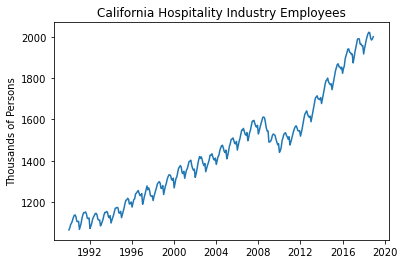

In [2]:
## CODE HERE
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df)
ax.set_title("California Hospitality Industry Employees")
ax.set_ylabel('Thousands of Persons');



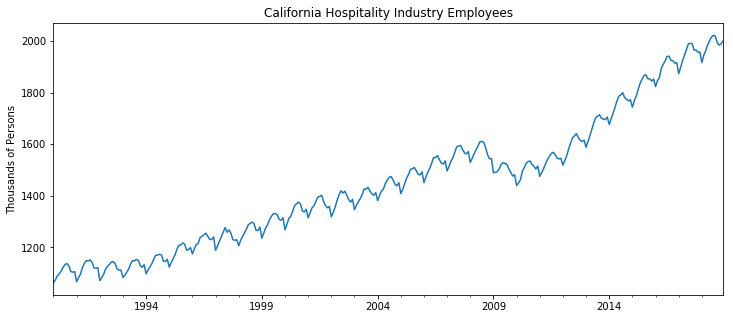

In [2]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

<Figure size 432x288 with 0 Axes>

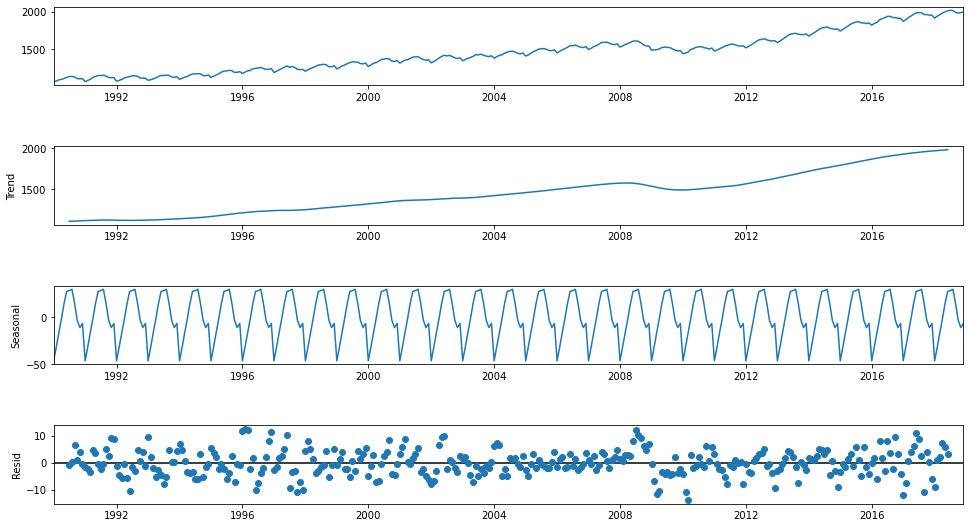

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, freq=12 )
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

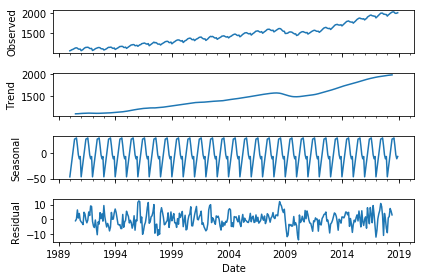

In [3]:
# DON'T WRITE HERE

### 3. Test to see if the data is currently stationary. If not transform the data to make it more stationary.  




In [4]:
#create a function that will help us to quickly test stationarity
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value', '#Lags Used',
                                             'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print (dfoutput)

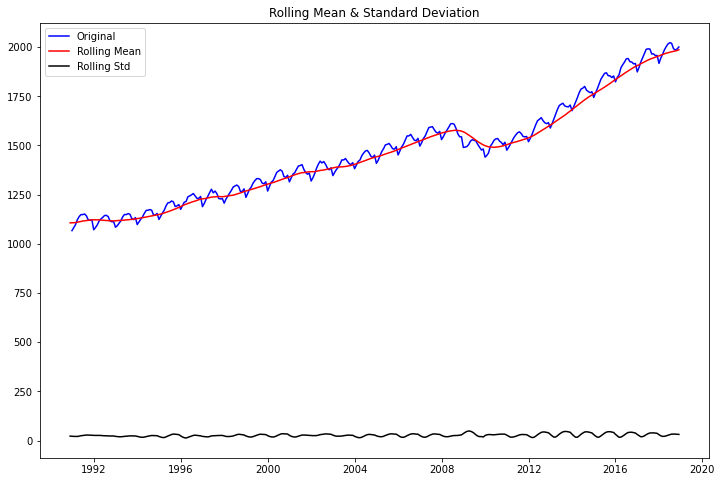

Results of Dickey-Fuller Test:
Test Statistic                   0.901284
p-value                          0.993107
#Lags Used                      17.000000
Number of Observations Used    330.000000
Critical Value (1%)             -3.450322
Critical Value (5%)             -2.870338
Critical Value (10%)            -2.571458
dtype: float64


In [5]:
test_stationarity(df.Employees, 12)

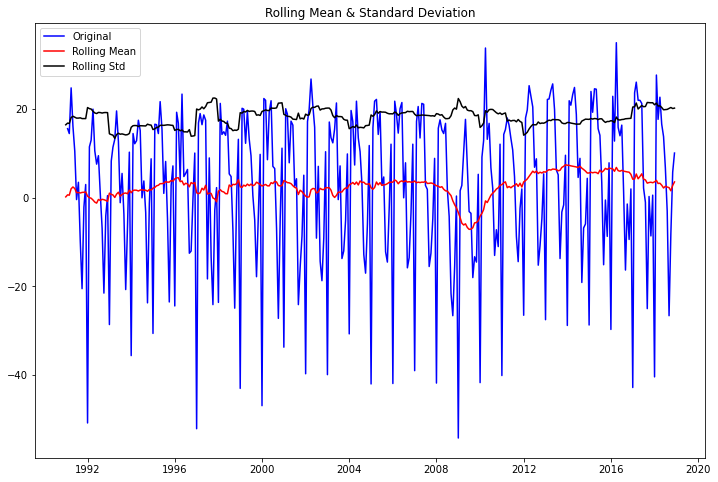

Results of Dickey-Fuller Test:
Test Statistic                  -3.068279
p-value                          0.028992
#Lags Used                      17.000000
Number of Observations Used    329.000000
Critical Value (1%)             -3.450384
Critical Value (5%)             -2.870365
Critical Value (10%)            -2.571472
dtype: float64


In [6]:
df['first_difference'] = df.Employees - df.Employees.shift(1)  
test_stationarity(df.first_difference.dropna(inplace=False),12)

Our data is now more stationary.


### 4. Graph the ACF and PACF plots of your stationary data to determine the possible parameters for the ARIMA or SARIMA model.

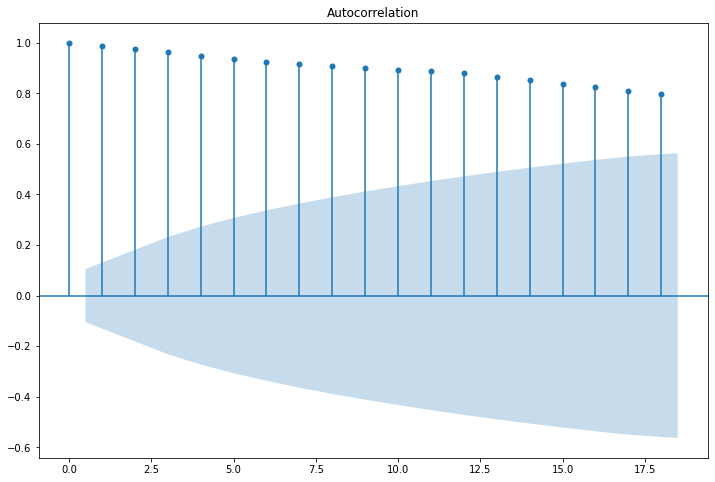

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot()
#plot the ACF
fig = plot_acf(df.Employees.iloc[1:], lags=18, ax=ax1)

In [12]:
df

,Employees,first_difference
Date,,
1990-01-01,1064.5,NaN
1990-02-01,1074.5,10.0
1990-03-01,1090.0,15.5
1990-04-01,1097.4,7.4
1990-05-01,1108.7,11.3
...,...,...
2018-08-01,2019.1,-3.0
2018-09-01,1992.5,-26.6
2018-10-01,1984.3,-8.2


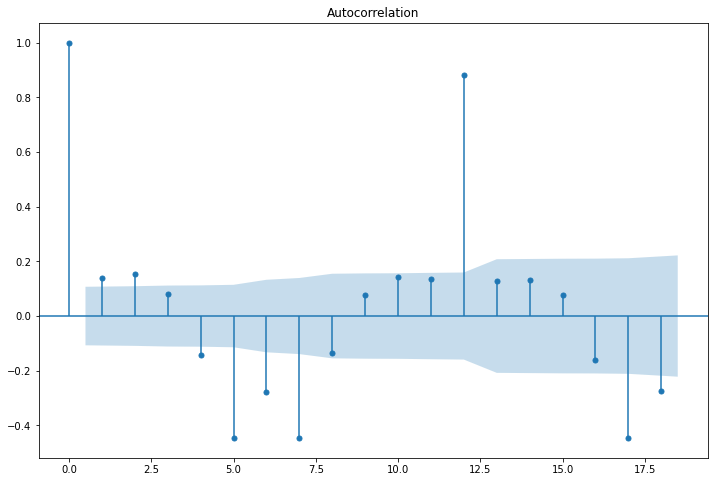

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot()
#plot the ACF
fig = plot_acf(df.first_difference.iloc[13:], lags=18, ax=ax1)

In [ ]:
# write your ideal parameters here.

### 5. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [ ]:
auto_arima(monthly_sales['payment_amount'],seasonal=True,m=12).summary()

In [4]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Wed, 27 Mar 2019   AIC                           2277.328
Time:                                    13:12:10   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 6. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [5]:
# DON'T WRITE HERE

### 7. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [6]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 8. Obtain predicted values

In [7]:
# DON'T WRITE HERE

### 9. Plot predictions against known values
Optional: add a title and y-axis label.

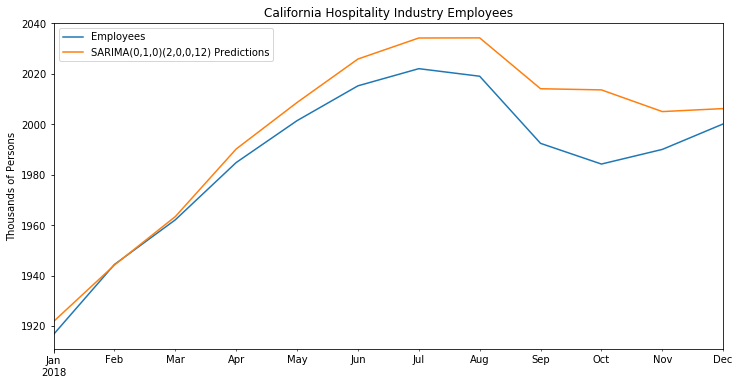

In [8]:
# DON'T WRITE HERE

### 10. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [9]:
# DON'T WRITE HERE

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 11. Retrain the model on the full data and forecast one year into the future

In [10]:
# DON'T WRITE HERE

### 12. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

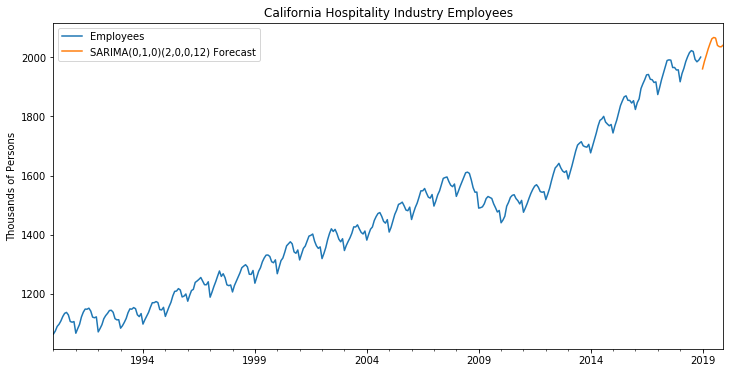

In [11]:
# DON'T WRITE HERE

# 13 Write down a list of potential datasets that you would like to use as exogenous variables to improve your prediction.  

In [3]:
# write list below

## Great job!